<a href="https://colab.research.google.com/github/Ladangigo/WORDLE_Entendimiento_datos/blob/main/Limpieza_de_archivos_verificando_calidad_del_banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
from collections import OrderedDict
import nltk
from nltk.corpus import stopwords
import os
nltk.download('stopwords')
stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
with open('/content/Data/uniondearchivos.txt', 'r',encoding="utf8") as raw_file:
    archivo = raw_file.read()

In [ ]:
txt = archivo.split(' ')
print(len(txt))
print(txt[1700:1850])

422763
['aeronave', 'está', 'estacionada', 'en', 'tierra', 'se', 'le', 'realiza', 'un', 'chequeo', 'a', 'cargo', 'de', 'una', 'empresa', 'de', 'manejo', 'en', 'tierra', 'de', 'aeronaves.\n\nLos', 'aeropuertos', 'poseen', 'generalmente', 'un', 'área', 'designada', 'especialmente', 'al', 'proceso', 'de', 'carga,', 'con', 'hangares', 'destinados', 'al', 'almacenamiento', 'de', 'la', 'carga', 'a', 'ser', 'transportada', 'y', 'equipamientos', 'necesarios', 'para', 'su', 'manejo,', 'así', 'como', 'personal', 'especializado.\n\nLos', 'aeropuertos', 'son', 'administrados', 'por', 'el', 'Estado,', 'el', 'municipio', 'o', 'por', 'un', 'privado', 'a', 'quién', 'se', 'le', 'ha', 'dado', 'esta', 'tarea', 'en', 'concesión.', '\n\nEl', 'concesionario', 'o', 'administrador', 'del', 'aeropuerto', 'puede', 'tener', 'una', 'concesión', 'mixta;', 'es', 'decir,', 'puede', 'mantener', 'solamente', 'las', 'terminales', 'o', 'solamente', 'las', 'pistas,', 'en', 'la', 'mayoría', 'de', 'los', 'casos', 'se', 'co

In [ ]:
if 'Býblos),' in txt:
  print('Sí esta')
else:
  print('No esta')

Sí esta


In [ ]:
symbols = ['¿','?','~','`','!','¡','@','#','$','%','^','*','(',')','_','-','+','=','{','}','[',']','\\',':',';','<','>','/', '.', ',','&','\r','\t','\n', '|', '“', '"', '–', '”', '©', '-', '—','…', ';', '‘','’',"'",'\xa0']
for char in symbols:
  archivo = archivo.replace(char,' ')

In [ ]:
print(len(symbols))

48


In [ ]:
txt2 = archivo.split(' ')
print(len(txt2))

504934


In [ ]:
if 'Býblos' in txt2:
  print('Sí esta')
else:
  print('No esta')

Sí esta


In [ ]:
#Elimino siglas y números romanos
file_uppercase = [word for word in txt2 if word.isupper()]
file_without_acronym = []
    
for position in txt2:
  if position not in file_uppercase:
    file_without_acronym.append(position)

In [ ]:
print(len(file_without_acronym))

501350


In [ ]:
if 'Býblos' in file_without_acronym:
  print('Sí esta')
else:
  print('No esta')

Sí esta


In [ ]:
#Elimino palabras que contengan mas de dos letras en mayusculas
file_wuppercase = [ ]
file_wout_uppercase = [ ]
cont = 0    
for term in file_without_acronym:
  cont = 0
  for let in term:
    if let.isupper(): cont +=1
    if cont == 2: 
        file_wuppercase.append(term)
    
for con in file_without_acronym:
  if con not in file_wuppercase: file_wout_uppercase.append(con)

In [ ]:
print(len(file_wout_uppercase))

501292


In [ ]:
if 'Býblos' in file_wout_uppercase:
  print('Sí esta')
else:
  print('No esta')

Sí esta


In [ ]:
#convierto la lista en un srt
texto1 = " ".join(file_wout_uppercase)

In [ ]:
#cambia todo a minúsculas 
file_lowercase = texto1.lower() 

In [ ]:
print(file_lowercase[9:100])

erto es un aeródromo con terminal para el viaje de transporte aéreo en aeronave  las funcio


In [ ]:
if 'býblos' in file_lowercase:
  print('Sí esta')
else:
  print('No esta')

Sí esta


In [ ]:
texto2 = "".join(file_lowercase)

In [ ]:
print(texto2[:100])
textocontildes = texto2.split(' ')
print(textocontildes[:100])

un aeropuerto es un aeródromo con terminal para el viaje de transporte aéreo en aeronave  las funcio
['un', 'aeropuerto', 'es', 'un', 'aeródromo', 'con', 'terminal', 'para', 'el', 'viaje', 'de', 'transporte', 'aéreo', 'en', 'aeronave', '', 'las', 'funciones', 'del', 'aeropuerto', 'son', 'variadas', '', 'entre', 'ellas', 'el', 'aterrizaje', 'y', 'despegue', 'de', 'aeronaves', '', 'embarque', 'y', 'desembarque', 'de', 'pasajeros', '', 'equipaje', 'y', 'mercancía', '', 'reabastecimiento', 'de', 'combustible', 'y', 'mantenimiento', 'de', 'aeronaves', '', 'así', 'como', 'lugar', 'de', 'estacionamiento', 'para', 'aquellas', 'que', 'no', 'están', 'en', 'servicio', '', 'los', 'aeropuertos', 'sirven', 'para', 'aviación', 'militar', '', 'comercial', 'o', 'general', '', '1', '\u200b', '', 'los', 'aeropuertos', 'se', 'dividen', 'en', 'dos', 'partes', '', '', 'un', 'aeródromo', 'es', 'un', 'área', 'definida', 'de', 'tierra', 'que', 'incluye', 'todas', 'sus', 'edificaciones', '']


In [ ]:
#cambio acentos
text_without_digits = re.sub(r"á","a", texto2)
texte = re.sub(r"é","e", text_without_digits)
texti = re.sub(r"í","i", texte)
texto = re.sub(r"ó","o", texti)
textu = re.sub(r"ú","u", texto)


In [ ]:
t  = textu.split(' ')
print(len(t))
print(t[:100])

palabrasdospuntitos = [ ]

    
for w in t:
  for r in w:
    if r in 'äëöüïýść':
      palabrasdospuntitos.append(w)

print(len(palabrasdospuntitos))
print(palabrasdospuntitos)

501292
['un', 'aeropuerto', 'es', 'un', 'aerodromo', 'con', 'terminal', 'para', 'el', 'viaje', 'de', 'transporte', 'aereo', 'en', 'aeronave', '', 'las', 'funciones', 'del', 'aeropuerto', 'son', 'variadas', '', 'entre', 'ellas', 'el', 'aterrizaje', 'y', 'despegue', 'de', 'aeronaves', '', 'embarque', 'y', 'desembarque', 'de', 'pasajeros', '', 'equipaje', 'y', 'mercancia', '', 'reabastecimiento', 'de', 'combustible', 'y', 'mantenimiento', 'de', 'aeronaves', '', 'asi', 'como', 'lugar', 'de', 'estacionamiento', 'para', 'aquellas', 'que', 'no', 'estan', 'en', 'servicio', '', 'los', 'aeropuertos', 'sirven', 'para', 'aviacion', 'militar', '', 'comercial', 'o', 'general', '', '1', '\u200b', '', 'los', 'aeropuertos', 'se', 'dividen', 'en', 'dos', 'partes', '', '', 'un', 'aerodromo', 'es', 'un', 'area', 'definida', 'de', 'tierra', 'que', 'incluye', 'todas', 'sus', 'edificaciones', '']
255
['gödel', 'gödel', 'gödel', 'gödel', 'antigüedad', 'antigüedades', 'antigüedades', 'günter', 'lingüisticos', 

In [ ]:
if 'edad' in palabrasdospuntitos:
  print('Sí esta')
else:
  print('No esta')

No esta


In [ ]:
file_without_numbers = [ ]
file_without_numbers = re.findall(r'[aA-zZÑñ]+', textu) 

In [ ]:
print(len(file_without_numbers))
print(file_without_numbers[:100])

418786
['un', 'aeropuerto', 'es', 'un', 'aerodromo', 'con', 'terminal', 'para', 'el', 'viaje', 'de', 'transporte', 'aereo', 'en', 'aeronave', 'las', 'funciones', 'del', 'aeropuerto', 'son', 'variadas', 'entre', 'ellas', 'el', 'aterrizaje', 'y', 'despegue', 'de', 'aeronaves', 'embarque', 'y', 'desembarque', 'de', 'pasajeros', 'equipaje', 'y', 'mercancia', 'reabastecimiento', 'de', 'combustible', 'y', 'mantenimiento', 'de', 'aeronaves', 'asi', 'como', 'lugar', 'de', 'estacionamiento', 'para', 'aquellas', 'que', 'no', 'estan', 'en', 'servicio', 'los', 'aeropuertos', 'sirven', 'para', 'aviacion', 'militar', 'comercial', 'o', 'general', 'los', 'aeropuertos', 'se', 'dividen', 'en', 'dos', 'partes', 'un', 'aerodromo', 'es', 'un', 'area', 'definida', 'de', 'tierra', 'que', 'incluye', 'todas', 'sus', 'edificaciones', 'instalaciones', 'y', 'equipos', 'destinado', 'total', 'o', 'parcialmente', 'a', 'la', 'llegada', 'partida', 'o', 'movimiento', 'de', 'aeronaves']


In [ ]:
file_without_duplicates = [ ]
file_without_duplicates = list(OrderedDict.fromkeys(file_without_numbers))



In [ ]:
print(len(file_without_duplicates))

33134


In [ ]:
file_without_stopwords = []
for item in file_without_duplicates:
  if not item in stop_words:
     file_without_stopwords.append(item)

In [ ]:
print(len(file_without_stopwords))
print(file_without_stopwords)

32973
['aeropuerto', 'aerodromo', 'terminal', 'viaje', 'transporte', 'aereo', 'aeronave', 'funciones', 'variadas', 'aterrizaje', 'despegue', 'aeronaves', 'embarque', 'desembarque', 'pasajeros', 'equipaje', 'mercancia', 'reabastecimiento', 'combustible', 'mantenimiento', 'asi', 'lugar', 'estacionamiento', 'aquellas', 'estan', 'servicio', 'aeropuertos', 'sirven', 'aviacion', 'militar', 'comercial', 'general', 'dividen', 'dos', 'partes', 'area', 'definida', 'tierra', 'incluye', 'todas', 'edificaciones', 'instalaciones', 'equipos', 'destinado', 'total', 'parcialmente', 'llegada', 'partida', 'movimiento', 'aquellos', 'aerodromos', 'publicos', 'cuentan', 'servicios', 'intensidad', 'justifiquen', 'tal', 'denominacion', 'vuelos', 'provenientes', 'destino', 'extranjero', 'presten', 'sanidad', 'aduana', 'migraciones', 'denominan', 'internacionales', 'helipuertos', 'definen', 'destinados', 'ser', 'utilizados', 'solamente', 'helicopteros', 'aplicables', 'disposiciones', 'relativas', 'clasificacion

In [ ]:
short_words = []
for word in file_without_stopwords:
    if len(word)<4:
      short_words.append(word)
    
clean_file = []
for count in file_without_stopwords:
  if count not in short_words:
    clean_file.append(count)

In [ ]:
print(len(clean_file))
print(clean_file)

32430
['aeropuerto', 'aerodromo', 'terminal', 'viaje', 'transporte', 'aereo', 'aeronave', 'funciones', 'variadas', 'aterrizaje', 'despegue', 'aeronaves', 'embarque', 'desembarque', 'pasajeros', 'equipaje', 'mercancia', 'reabastecimiento', 'combustible', 'mantenimiento', 'lugar', 'estacionamiento', 'aquellas', 'estan', 'servicio', 'aeropuertos', 'sirven', 'aviacion', 'militar', 'comercial', 'general', 'dividen', 'partes', 'area', 'definida', 'tierra', 'incluye', 'todas', 'edificaciones', 'instalaciones', 'equipos', 'destinado', 'total', 'parcialmente', 'llegada', 'partida', 'movimiento', 'aquellos', 'aerodromos', 'publicos', 'cuentan', 'servicios', 'intensidad', 'justifiquen', 'denominacion', 'vuelos', 'provenientes', 'destino', 'extranjero', 'presten', 'sanidad', 'aduana', 'migraciones', 'denominan', 'internacionales', 'helipuertos', 'definen', 'destinados', 'utilizados', 'solamente', 'helicopteros', 'aplicables', 'disposiciones', 'relativas', 'clasificacion', 'procedimientos', 'autori

In [ ]:
#organizar lista de palabras con acentos de otros idiomas

dospunticossinduplciados=[ ]
dospunticossinduplciados= list(OrderedDict.fromkeys(palabrasdospuntitos))
print(f'al eliminar duplicados quedan {len(dospunticossinduplciados)} palabras')
print(dospunticossinduplciados)

dospuntitosstr = " ".join(dospunticossinduplciados)

cotaracentos = [ ]
cotaracentos = re.findall(r'[aA-zZÑñ]+', dospuntitosstr) 

print(f'al eliminar acentos quedan {len(cotaracentos)} palabras')

#Se eliminan las letras que queden menor a 3 letras
word=0
palabrascortas = []
for word in cotaracentos:
    if len(word)<4:
      palabrascortas.append(word)

count=0    
palabrasdepuesdedospuntos = []
for count in cotaracentos:
  if count not in palabrascortas:
    palabrasdepuesdedospuntos.append(count)

atipicos_final= [ ]
atipicos_final= list(OrderedDict.fromkeys(palabrasdepuesdedospuntos))

print(f' después de todo el proceso quedaron en total {len(palabrasdepuesdedospuntos)} palabras')
print(palabrasdepuesdedospuntos)
print(len(atipicos_final))

al eliminar duplicados quedan 100 palabras
['gödel', 'antigüedad', 'antigüedades', 'günter', 'lingüisticos', 'athenäum', 'ambigüedad', 'lingüistica', 'köhler', 'wölfflin', 'pächt', 'bön', 'lingüista', 'býblos', 'löwy', 'ibargüen', 'lingüisticas', 'lingüistas', 'multilingüismo', 'röhm', 'bilingües', 'monolingüe', 'argüir', 'lingüistico', 'waldseemüller', 'münchhausen', 'darśana', 'güijera', 'tesgüino', 'lingüisticamente', 'lýkeio', 'idrýmata', 'karagöz', 'laïko', 'solidarność', 'endlösung', 'göring', 'völkisch', 'unglück', 'stürmer', 'für', 'niemöller', 'düsseldorf', 'königsberg', 'eichstät', 'ermächtigungsgesetz', 'führer', 'schönerer', 'jüdische', 'endgültigen', 'lösung', 'müller', 'höppner', 'höss', 'söhne', 'ambigüedades', 'arbëreshë', 'händel', '«minnesänger»', 'erdödy', 'pückler', 'mäzel', 'hüttenbrenner', 'anschütz', 'währing', 'frühling', 'stübel', 'gospić', 'mandić', 'orlović', 'petrović', 'jovanović', 'röntgen', 'bošković', 'kosanović', 'odýsseia', 'hammarskjöld', 'güerrin', '

In [ ]:
with open('palabras_atipicas.txt', 'w', encoding="utf8" ) as fileatipico:
         fileatipico.write(' '.join(palabrasdepuesdedospuntos))

In [ ]:
if 'edad' in palabrasdepuesdedospuntos:
  print('yes')
else:
  print('no')

yes


In [ ]:
if 'mata' in clean_file:
  print('sí')

sí


In [ ]:
difference_1 = set(clean_file).difference(set(palabrasdepuesdedospuntos))

In [ ]:
print(len(difference_1))
print(difference_1)

32345
{'conmina', 'trataria', 'indeseables', 'entrevistarse', 'insertada', 'incapacidades', 'dependera', 'arango', 'particion', 'tunel', 'efigie', 'adversarios', 'escenicas', 'cadetes', 'anglicanismo', 'tres', 'oponian', 'gaullistas', 'abonado', 'comun', 'escarpados', 'dedicados', 'impresa', 'autoridades', 'esfuerzan', 'discipulos', 'bosch', 'apropiada', 'abarcadoras', 'favorables', 'delgado', 'improvisa', 'espectaculo', 'puso', 'precario', 'capsulas', 'caracterizaciones', 'iron', 'formulada', 'leopardi', 'disminuidos', 'confucionismo', 'libre', 'orinoco', 'naturalis', 'prestancia', 'marat', 'indujo', 'recibiendo', 'protogermanico', 'funicul', 'uniones', 'nikolai', 'hasmoneo', 'mantuvieran', 'eliminacion', 'ludica', 'doscientos', 'provoco', 'sermon', 'antigono', 'ruborizado', 'climatica', 'pastar', 'iraq', 'trivialidad', 'anticipa', 'elites', 'literal', 'depositos', 'ngirsu', 'peste', 'eter', 'lechon', 'obtenidas', 'plantear', 'alternador', 'movil', 'homenajearla', 'basta', 'gobiernan'

In [ ]:
list_difference = []
for element in clean_file:
    if element in palabrasdepuesdedospuntos:
        list_difference.append(element)

print(list_difference)
print(len(list_difference))

['edad', 'antig', 'edades', 'nter', 'ling', 'isticos', 'athen', 'ambig', 'istica', 'hler', 'lfflin', 'sung', 'ista', 'blos', 'ibarg', 'isticas', 'istas', 'multiling', 'ismo', 'biling', 'monoling', 'istico', 'waldseem', 'ller', 'nchhausen', 'ijera', 'tesg', 'isticamente', 'keio', 'mata', 'karag', 'solidarno', 'endl', 'ring', 'lkisch', 'ungl', 'rmer', 'niem', 'sseldorf', 'nigsberg', 'eichst', 'chtigungsgesetz', 'hrer', 'nerer', 'dische', 'endg', 'ltigen', 'ppner', 'resh', 'ndel', 'minnes', 'nger', 'ckler', 'ttenbrenner', 'ansch', 'hring', 'hling', 'gospi', 'mandi', 'orlovi', 'petrovi', 'jovanovi', 'ntgen', 'kovi', 'kosanovi', 'sseia', 'hammarskj', 'errin', 'etnoling', 'lkerwanderung', 'rterbuch', 'bront', 'nicarag', 'ense', 'leng', 'etas', 'weser', 'bung', 'chler', 'nther', 'dukraine', 'nitz', 'nder', 'sthetik', 'ssli']
85


In [ ]:
Longit_alfa=[]
for l in list_difference:
  longi=len(l)
  Longit_alfa.append(longi)

In [ ]:
print(Longit_alfa)
if 12 in Longit_alfa:
  print('Si')
else:
  print('no')

[4, 5, 6, 4, 4, 7, 5, 5, 6, 4, 6, 4, 4, 4, 5, 7, 5, 9, 4, 6, 8, 6, 8, 4, 9, 5, 4, 11, 4, 4, 5, 9, 4, 4, 6, 4, 4, 4, 8, 8, 6, 15, 4, 5, 6, 4, 6, 5, 4, 4, 6, 4, 5, 11, 5, 5, 5, 5, 5, 6, 7, 8, 5, 4, 8, 5, 9, 5, 8, 13, 8, 5, 7, 4, 4, 4, 5, 4, 5, 5, 8, 4, 4, 7, 4]
no


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


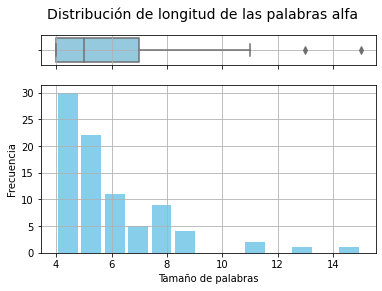

In [ ]:
#Graficar como es la distribución en cuanto a la longitud de la palabra de las palabras alfa

import seaborn as sns
import matplotlib.pyplot as plt
sns.color_palette("Paired")
x = Longit_alfa
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.15, .85)})
                     
f.suptitle('Distribución de longitud de las palabras alfa', fontsize=14)
fig = sns.boxplot(x, ax=ax[0], color='skyblue' )
sns.color_palette("Paired")
fig.axes.axes.grid(True)
#fig.set_title('longitud de las palabras - medidas de posición', fontsize=13)
plt.hist(x, bins=(max(Longit_alfa)-min(Longit_alfa)+2),rwidth=0.85,color='skyblue')
#plt.title('Frecuencia de longitud de palabras')
plt.xlabel('Tamaño de palabras')
plt.ylabel('Frecuencia')
plt.grid(True)


In [ ]:
print(len(palabrasdepuesdedospuntos))
print(len(list_difference))
difference_2 = set(list_difference).difference(set(palabrasdepuesdedospuntos))
print(len(difference_2))

101
85
0


In [ ]:
#Conocer la posicion de vocales y consonantes dentro de cada palabra
import pandas as pd
DicToDF_positionvowelsCons = {'Palabra':[],'Longitud': [], 'posicionVocal':[], 'posicionCons': []}
vowels = []
cons = []

for word in clean_file:
  DicToDF_positionvowelsCons['Palabra'].append(word)
  lengthWord = len(word)
  DicToDF_positionvowelsCons['Longitud'].append(lengthWord)

  for position,letter in enumerate(word): 
    if letter in 'aeiou':
      vowels.append(position)
    else:
      cons.append(position)
  DicToDF_positionvowelsCons['posicionVocal'].append(vowels)
  DicToDF_positionvowelsCons['posicionCons'].append(cons)
  vowels =[]
  cons = []

DF_positionvowelsCons = pd.DataFrame(DicToDF_positionvowelsCons)

In [ ]:
DF_positionvowelsCons['Longitud'].value_counts()

8     4873
7     4686
9     4535
10    3821
6     3687
5     2726
11    2668
12    1769
4     1284
13    1096
14     613
15     353
16     184
17      76
18      35
19      16
20       5
21       2
25       1
Name: Longitud, dtype: int64

In [ ]:
with open('final_cleanLauraV4.txt', 'w', encoding="utf8" ) as f:
         f.write(' '.join(clean_file))

In [ ]:
print(textocontildes[:100])
print(len(textocontildes))

tildes_sinduplicados = [ ]
tildes_sinduplicados = list(OrderedDict.fromkeys(textocontildes))

print(len(tildes_sinduplicados))
print(tildes_sinduplicados[:100])

['un', 'aeropuerto', 'es', 'un', 'aeródromo', 'con', 'terminal', 'para', 'el', 'viaje', 'de', 'transporte', 'aéreo', 'en', 'aeronave', '', 'las', 'funciones', 'del', 'aeropuerto', 'son', 'variadas', '', 'entre', 'ellas', 'el', 'aterrizaje', 'y', 'despegue', 'de', 'aeronaves', '', 'embarque', 'y', 'desembarque', 'de', 'pasajeros', '', 'equipaje', 'y', 'mercancía', '', 'reabastecimiento', 'de', 'combustible', 'y', 'mantenimiento', 'de', 'aeronaves', '', 'así', 'como', 'lugar', 'de', 'estacionamiento', 'para', 'aquellas', 'que', 'no', 'están', 'en', 'servicio', '', 'los', 'aeropuertos', 'sirven', 'para', 'aviación', 'militar', '', 'comercial', 'o', 'general', '', '1', '\u200b', '', 'los', 'aeropuertos', 'se', 'dividen', 'en', 'dos', 'partes', '', '', 'un', 'aeródromo', 'es', 'un', 'área', 'definida', 'de', 'tierra', 'que', 'incluye', 'todas', 'sus', 'edificaciones', '']
501292
35978
['un', 'aeropuerto', 'es', 'aeródromo', 'con', 'terminal', 'para', 'el', 'viaje', 'de', 'transporte', 'aére

In [ ]:
palabras_tildes = []
for palabra in tildes_sinduplicados:
    if len(palabra)<4:
      palabras_tildes.append(palabra)

palabras_tildes1 = []
for count in tildes_sinduplicados:
  if count not in palabras_tildes:
    palabras_tildes1.append(count)

item=0
palabrastildessin_stopwords = []
for item in palabras_tildes1:
  if not item in stop_words:
     palabrastildessin_stopwords.append(item)

In [ ]:
print(len(palabras_tildes1))
print(palabras_tildes1[:100])

print(len(palabrastildessin_stopwords))
print(palabrastildessin_stopwords[:100])

34635
['aeropuerto', 'aeródromo', 'terminal', 'para', 'viaje', 'transporte', 'aéreo', 'aeronave', 'funciones', 'variadas', 'entre', 'ellas', 'aterrizaje', 'despegue', 'aeronaves', 'embarque', 'desembarque', 'pasajeros', 'equipaje', 'mercancía', 'reabastecimiento', 'combustible', 'mantenimiento', 'como', 'lugar', 'estacionamiento', 'aquellas', 'están', 'servicio', 'aeropuertos', 'sirven', 'aviación', 'militar', 'comercial', 'general', 'dividen', 'partes', 'área', 'definida', 'tierra', 'incluye', 'todas', 'edificaciones', 'instalaciones', 'equipos', 'destinado', 'total', 'parcialmente', 'llegada', 'partida', 'movimiento', 'aquellos', 'aeródromos', 'públicos', 'cuentan', 'servicios', 'intensidad', 'justifiquen', 'denominación', 'vuelos', 'provenientes', 'destino', 'extranjero', 'donde', 'presten', 'sanidad', 'aduana', 'migraciones', 'otros', 'denominan', 'internacionales', 'helipuertos', 'definen', 'destinados', 'utilizados', 'solamente', 'helicópteros', 'tanto', 'aplicables', 'disposicio

In [ ]:
list1 = clean_file
print(len(list1))

32430


In [ ]:
cvb4 = [ ]
i = 0
for i in palabras_tildes1:
  cvb0 = re.sub(r"á","a", i)
  cvb1 = re.sub(r"é","e", cvb0)
  cvb3 = re.sub(r"í","i", cvb1)
  cvb2 = re.sub(r"ó","o", cvb3)
  cvb4 = re.sub(r"ú","u", cvb2)

  #print(cvb)

  for index,h in enumerate(list1):
    if cvb4 == h:
      list1[index]= i
      
 
print(len(list1))


KeyboardInterrupt: ignored

In [ ]:
print(list1)
lista1= list1[:325]

Encontrar las palabras que no son en español


In [ ]:
from googletrans import Translator

translator = Translator(service_urls=[
      'translate.google.com.co'
    ])
print(translator.detect('papá').lang) 

In [ ]:
translator = Translator(service_urls=[
      'translate.google.es'
    ])
a = translator.detect('taxi')
print(a.lang)

In [ ]:
a = len(list1)/100
print(a)

In [ ]:
a = 5
b = 0
for j in list1:

  lista_prueba = list1[b:a]

print(lista_prueba)

In [ ]:
# espanol = []
# otro = [ ]

# a = 5
# b = 0
# for j in list1:

#   lista_prueba = list1[b:a]

#   for i in lista_prueba:
#     traductor = translator.detect(i)
#     if traductor.lang == 'es':
#       espanol.append(i)
#     else:
#       otro.append(i)
#   b = a
#   a = a + 5
#   lista_prueba = [ ]

In [ ]:
# print(len(otro))
# print(otro)


In [ ]:
# print(len(espanol))
# print(espanol)